In [16]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys 

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Set plot style
sns.set(style="whitegrid")

In [7]:
DATA_DIR = "../data/raw/"
tickers = ["TSLA", "BND", "SPY"]

In [8]:
dfs = {}

for ticker in tickers:
    path = os.path.join(DATA_DIR, f"{ticker}.csv")
    df = pd.read_csv(path, index_col=0, parse_dates=True, date_format="%Y-%m-%d")
    df.index.name = "Date"
    dfs[ticker] = df
    print(f"{ticker} shape: {df.shape}")


TSLA shape: (2536, 5)
BND shape: (2536, 5)
SPY shape: (2536, 5)


In [9]:
for ticker, df in dfs.items():
    print(f"\n--- {ticker} ---")
    print(df.info())
    print(df.isna().sum())
    display(df.head(2))



--- TSLA ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2536 entries, NaT to 2025-07-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2536 non-null   object
 1   High    2536 non-null   object
 2   Low     2536 non-null   object
 3   Open    2536 non-null   object
 4   Volume  2536 non-null   object
dtypes: object(5)
memory usage: 118.9+ KB
None
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


,Close,High,Low,Open,Volume
Date,,,,,
NaT,TSLA,TSLA,TSLA,TSLA,TSLA
2015-07-01,17.94333267211914,18.174667358398438,17.856666564941406,18.073999404907227,31518000



--- BND ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2536 entries, NaT to 2025-07-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2536 non-null   object
 1   High    2536 non-null   object
 2   Low     2536 non-null   object
 3   Open    2536 non-null   object
 4   Volume  2536 non-null   object
dtypes: object(5)
memory usage: 118.9+ KB
None
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


,Close,High,Low,Open,Volume
Date,,,,,
NaT,BND,BND,BND,BND,BND
2015-07-01,60.81676483154297,60.914490569994754,60.76414239769737,60.794213179239875,5399300



--- SPY ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2536 entries, NaT to 2025-07-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2536 non-null   object
 1   High    2536 non-null   object
 2   Low     2536 non-null   object
 3   Open    2536 non-null   object
 4   Volume  2536 non-null   object
dtypes: object(5)
memory usage: 118.9+ KB
None
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


,Close,High,Low,Open,Volume
Date,,,,,
NaT,SPY,SPY,SPY,SPY,SPY
2015-07-01,174.91709899902344,175.3638741746747,174.12470140816666,175.1109794107984,135979900


In [17]:
from src.data_cleaning import clean_price_data
import pandas as pd

tsla_df = pd.read_csv('../data/raw/TSLA.csv', index_col=0, parse_dates=True)
bnd_df = pd.read_csv('../data/raw/BND.csv', index_col=0, parse_dates=True)
spy_df = pd.read_csv('../data/raw/SPY.csv', index_col=0, parse_dates=True)

tsla_clean = clean_price_data(tsla_df)
bnd_clean = clean_price_data(bnd_df)
spy_clean = clean_price_data(spy_df)

# Now check types
print(tsla_clean.dtypes)


Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


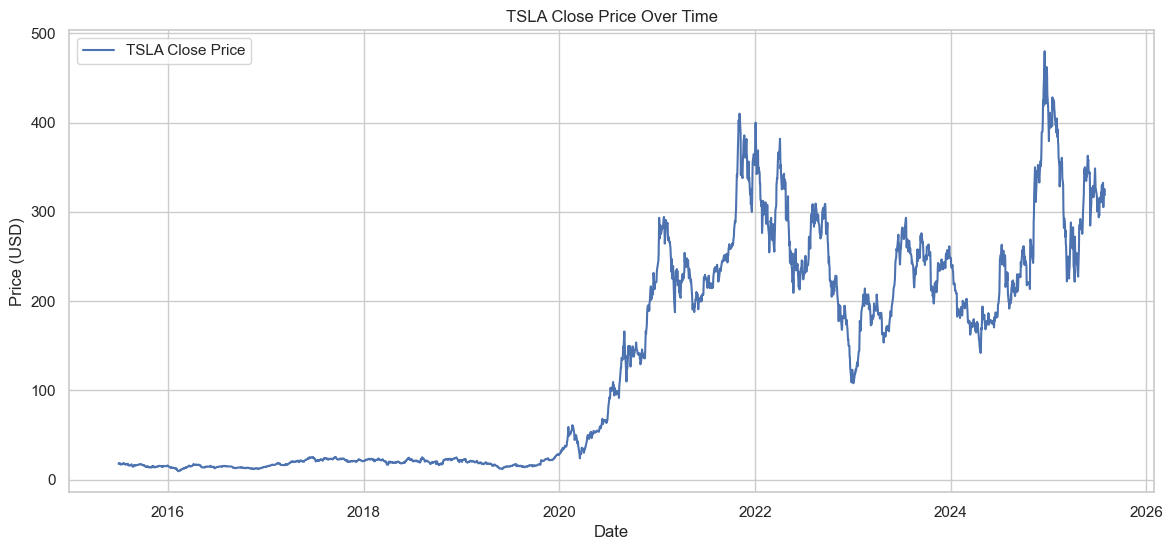

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14,6))
plt.plot(tsla_clean.index, tsla_clean['Close'], label='TSLA Close Price')
plt.title('TSLA Close Price Over Time')## TSLA Price Movement Summary (2015–2025)

- **2015–2019**: TSLA traded below $30 with minimal volatility, indicating a relatively stable market perception.
- **Late 2019–Early 2020**: A sharp upward movement marked the beginning of a major bull run, driven by strong fundamentals and market confidence.
- **2020–Early 2021**: Massive surge in price, peaking over $400. Investor enthusiasm and tech stock momentum contributed.
- **2021–Mid 2022**: High volatility set in. While the stock stayed above $200, fluctuations increased due to macroeconomic uncertainty.
- **Mid 2022–Late 2023**: A downturn bottomed out near the end of 2022, followed by a steady recovery.
- **Late 2023–Mid 2025**: Renewed growth led to a new all-time high in mid-2024. After that, the price corrected but remained in a higher band, reflecting market normalization.

These structural changes are ideal candidates for **change point detection** using Bayesian modeling.

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
## TSLA Price Movement Summary (2015–2025)

- **2015–2019**: TSLA traded below $30 with minimal volatility, indicating a relatively stable market perception.
- **Late 2019–Early 2020**: A sharp upward movement marked the beginning of a major bull run, driven by strong fundamentals and market confidence.
- **2020–Early 2021**: Massive surge in price, peaking over $400. Investor enthusiasm and tech stock momentum contributed.
- **2021–Mid 2022**: High volatility set in. While the stock stayed above $200, fluctuations increased due to macroeconomic uncertainty.
- **Mid 2022–Late 2023**: A downturn bottomed out near the end of 2022, followed by a steady recovery.
- **Late 2023–Mid 2025**: Renewed growth led to a new all-time high in mid-2024. After that, the price corrected but remained in a higher band, reflecting market normalization.

These structural changes are ideal candidates for **change point detection** using Bayesian modeling.


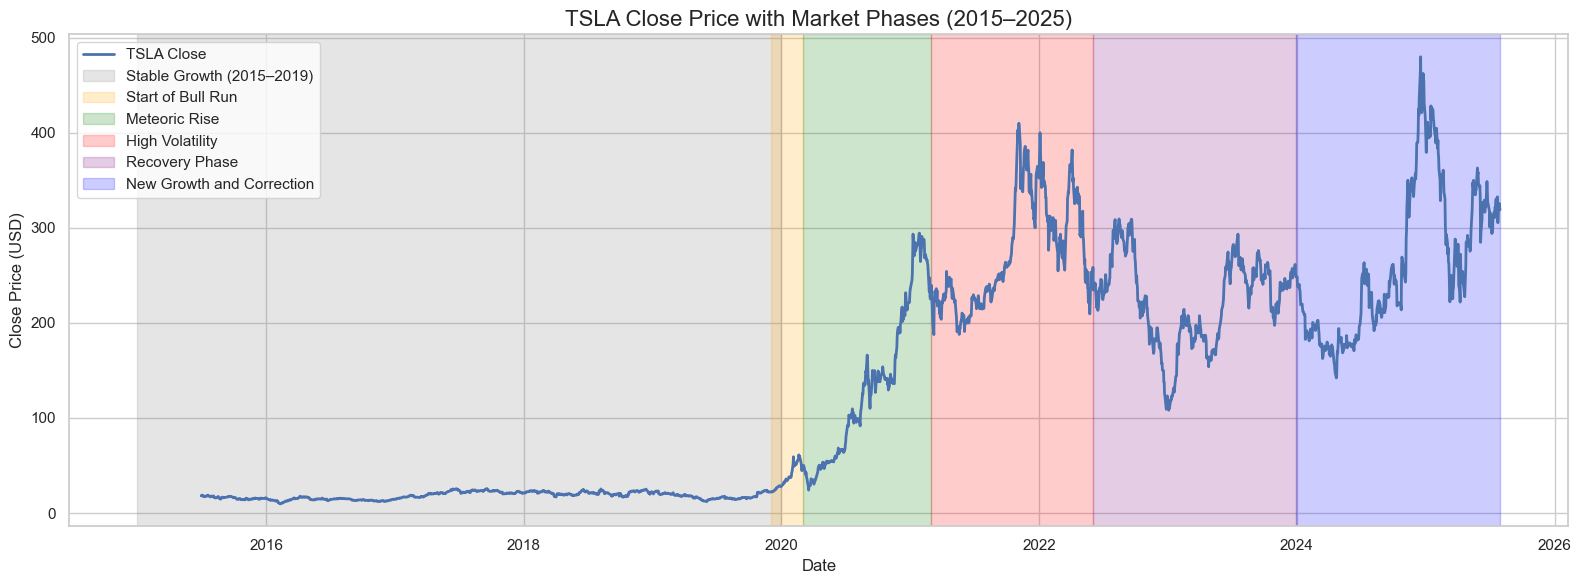

In [20]:
plt.figure(figsize=(16,6))
plt.plot(tsla_clean.index, tsla_clean['Close'], label='TSLA Close', linewidth=2)

# Annotating key periods
plt.axvspan('2015-01-01', '2019-12-31', color='gray', alpha=0.2, label='Stable Growth (2015–2019)')
plt.axvspan('2019-12-01', '2020-03-01', color='orange', alpha=0.2, label='Start of Bull Run')
plt.axvspan('2020-03-01', '2021-03-01', color='green', alpha=0.2, label='Meteoric Rise')
plt.axvspan('2021-03-01', '2022-06-01', color='red', alpha=0.2, label='High Volatility')
plt.axvspan('2022-06-01', '2023-12-31', color='purple', alpha=0.2, label='Recovery Phase')
plt.axvspan('2023-12-31', '2025-07-31', color='blue', alpha=0.2, label='New Growth and Correction')

plt.title('TSLA Close Price with Market Phases (2015–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


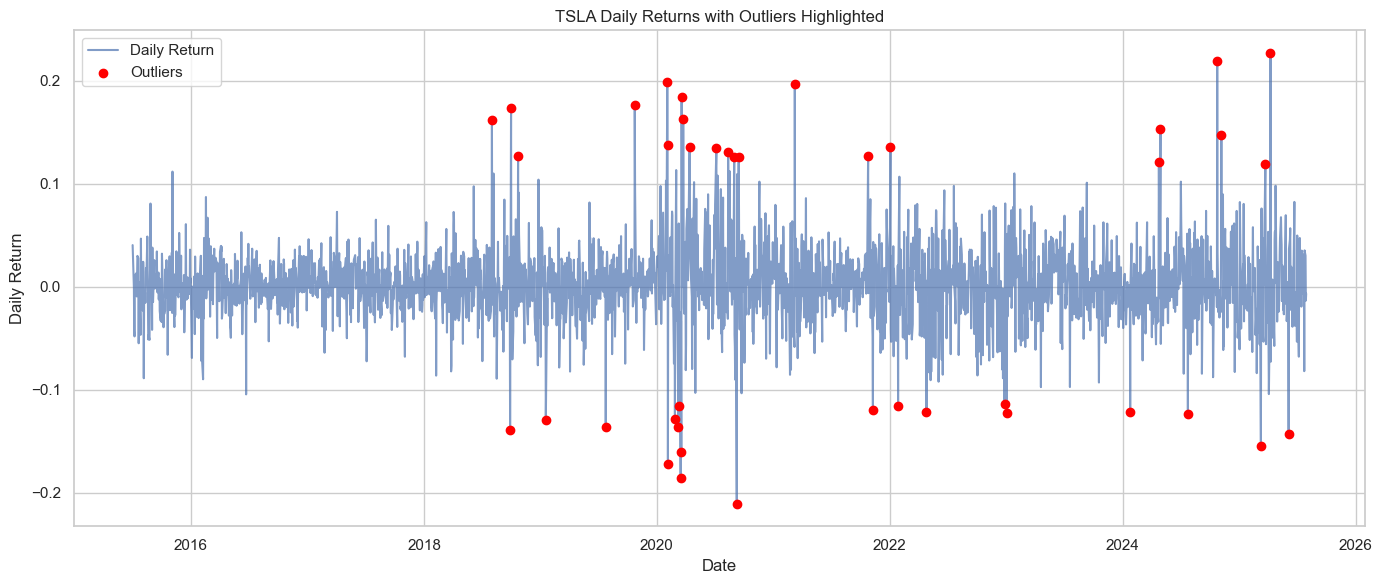

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate daily percentage change if not already
tsla_clean['daily_return'] = tsla_clean['Close'].pct_change()

# Drop NaN from first row
tsla_clean.dropna(subset=['daily_return'], inplace=True)

# Calculate Z-score of the daily returns
tsla_clean['z_score'] = zscore(tsla_clean['daily_return'])

# Identify outliers
outliers = tsla_clean[np.abs(tsla_clean['z_score']) > 3]

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(tsla_clean.index, tsla_clean['daily_return'], label='Daily Return', alpha=0.7)
plt.scatter(outliers.index, outliers['daily_return'], color='red', label='Outliers', zorder=5)
plt.title('TSLA Daily Returns with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
data = {
    'TSLA': tsla_df,
    'BND': bnd_df,
    'SPY': spy_df
}

In [28]:
for ticker, df in data.items():
    print(f"{ticker} - Non-numeric in 'Close':", df['Close'].apply(lambda x: isinstance(x, str)).sum())


TSLA - Non-numeric in 'Close': 2536
BND - Non-numeric in 'Close': 2536
SPY - Non-numeric in 'Close': 2536


In [29]:
for ticker in data:
    df = data[ticker].copy()
    df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    data[ticker] = df.dropna()


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = {}

for ticker in ['TSLA', 'BND', 'SPY']:
    df = data[ticker].copy()

    # Ensure index is datetime
    df = df.sort_index()  # optional but ensures order

    # Only fit on numeric Close column
    scaler = MinMaxScaler()
    df['Normalized_Close'] = scaler.fit_transform(df[['Close']])

    scaled_data[ticker] = df


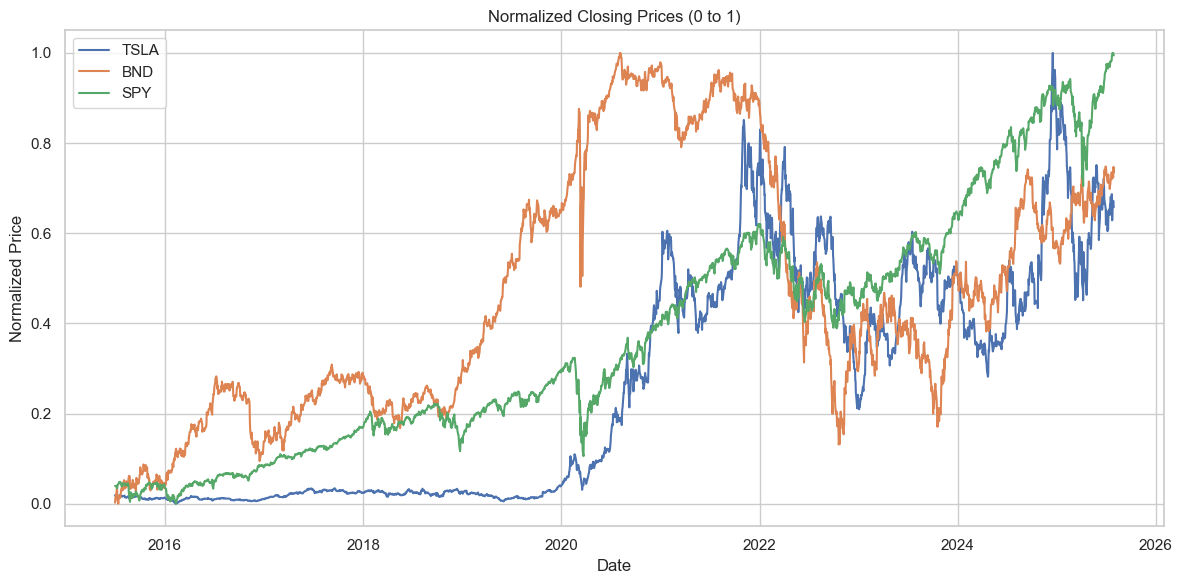

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for ticker in scaled_data:
    plt.plot(scaled_data[ticker].index, scaled_data[ticker]['Normalized_Close'], label=ticker)

plt.title("Normalized Closing Prices (0 to 1)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
summary = """
Normalized Price Trends (2015–2024)

- **TSLA (Blue Line)**: This asset showed the most dramatic and volatile performance. For several years (2015–2019), it remained at a low, stable normalized price. A massive surge began in late 2019, peaking in late 2021. After this peak, it experienced a significant correction but has since recovered and is trading at a high level. TSLA's normalized price shows its extreme growth and subsequent volatility compared to the other two assets.

- **BND (Orange Line)**: This represents a bond fund, which is typically considered a more conservative and less volatile investment. From 2015 to 2020, BND showed steady, albeit slow, growth. However, after 2020, it experienced a significant and consistent decline in value, reaching its low point around 2024. This reflects a period of rising interest rates, which typically cause bond prices to fall.

- **SPY (Green Line)**: This represents the S&P 500, a broad market index and a common benchmark for the overall stock market. SPY showed a consistent and steady upward trend throughout the entire period from 2015 to 2024, with only a few minor dips, such as the one in early 2020. This indicates a strong and sustained bull market for the S&P 500 over this decade.

**Summary**: The normalized chart effectively visualizes the different risk and return profiles of these three assets. TSLA represents a high-risk, high-reward growth stock. SPY represents the steady, long-term growth of the overall market. BND represents a more conservative asset whose performance was significantly impacted by macroeconomic factors like interest rates, particularly in recent years.
"""

with open("../reports/normalized_price_analysis.txt", "w") as f:
    f.write(summary.strip())


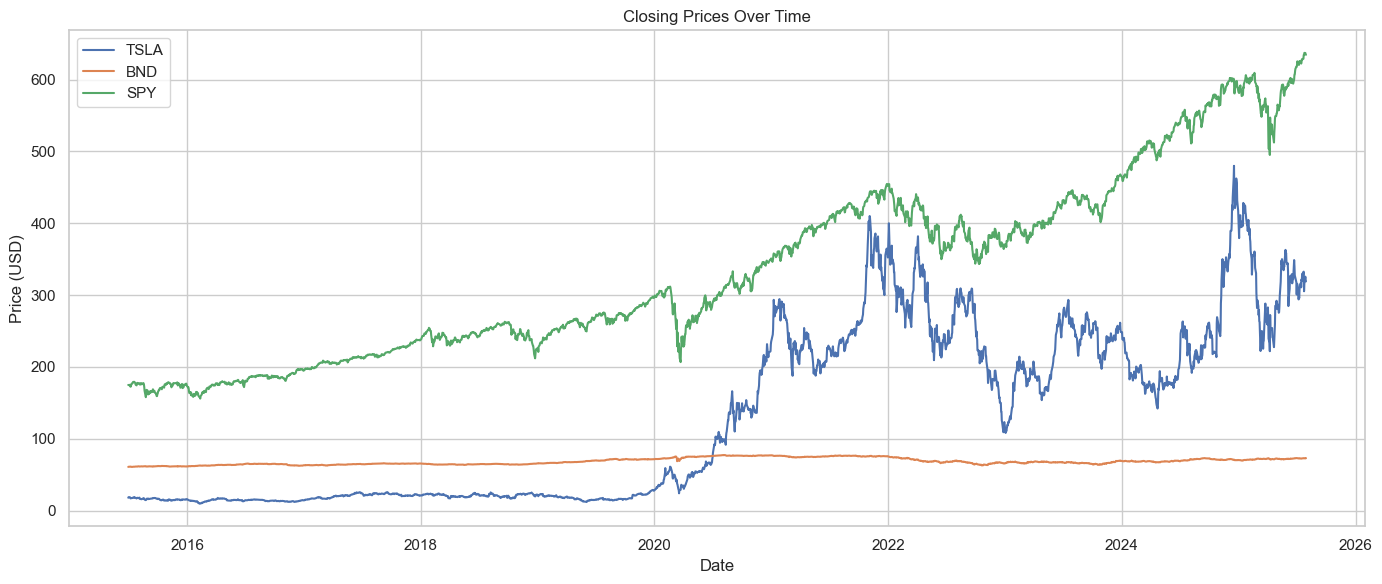

In [35]:
import matplotlib.pyplot as plt

# Plot closing prices for all three assets
plt.figure(figsize=(14, 6))
for ticker in ['TSLA', 'BND', 'SPY']:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


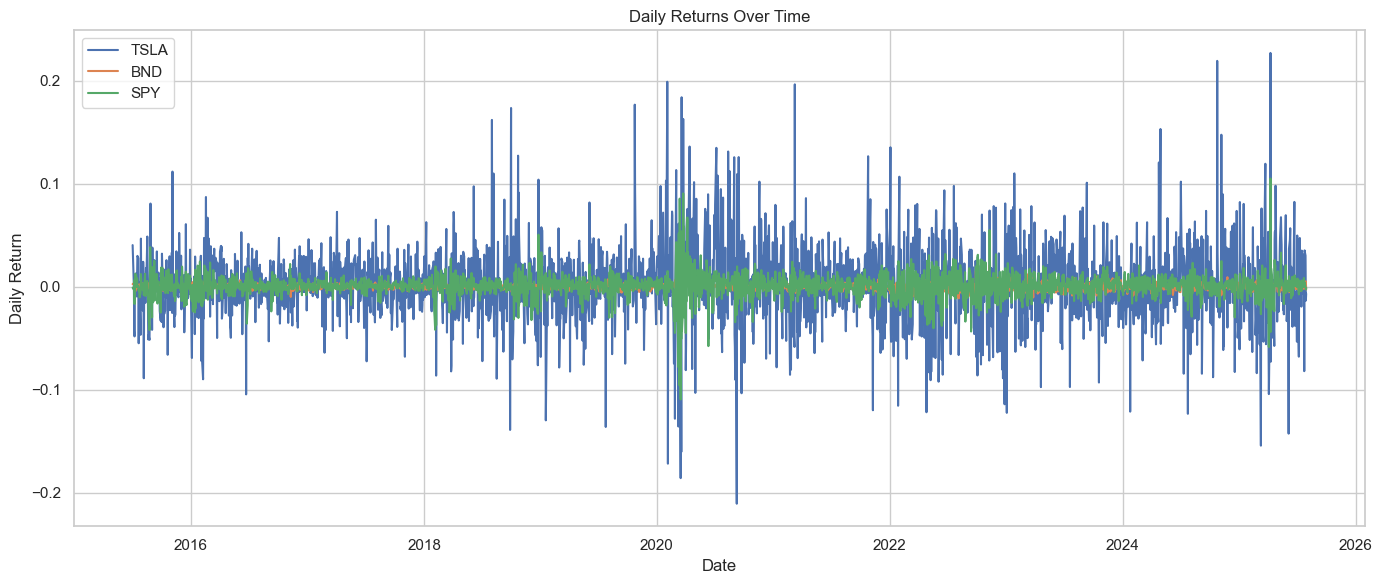

In [36]:
# Calculate daily returns
for ticker in ['TSLA', 'BND', 'SPY']:
    data[ticker]['Daily_Return'] = data[ticker]['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 6))
for ticker in ['TSLA', 'BND', 'SPY']:
    plt.plot(data[ticker]['Daily_Return'], label=ticker)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


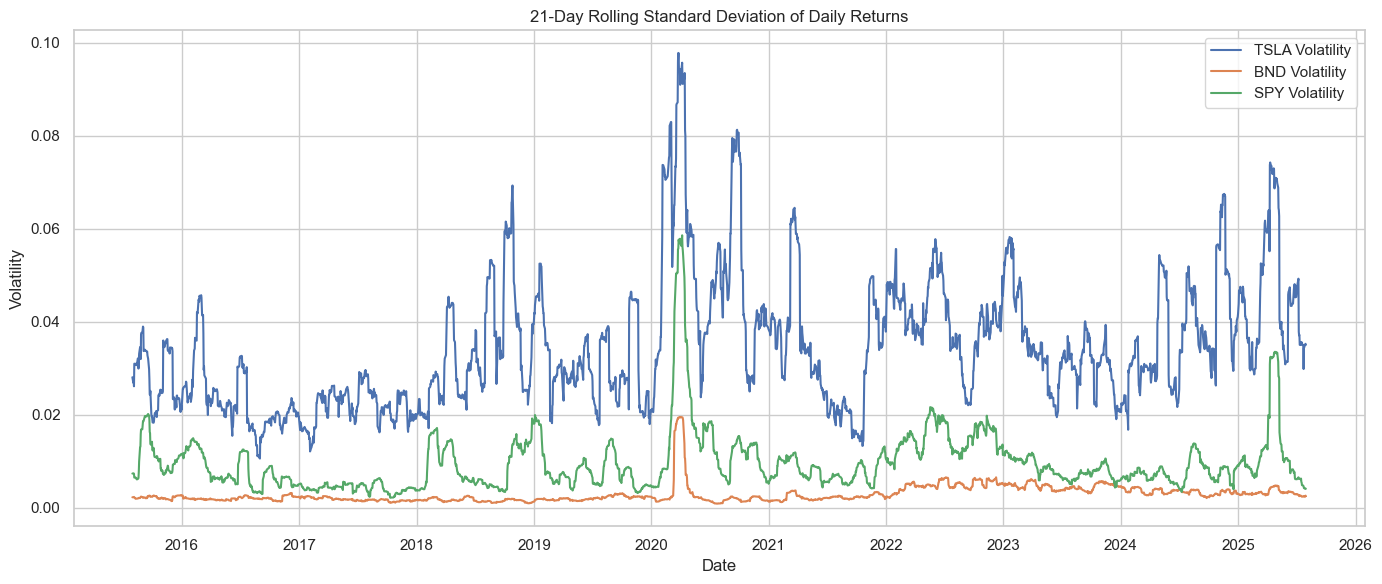

In [37]:
# Calculate rolling mean and std for volatility
window = 21  # ~1 month of trading days
for ticker in ['TSLA', 'BND', 'SPY']:
    data[ticker]['Rolling_Mean'] = data[ticker]['Daily_Return'].rolling(window).mean()
    data[ticker]['Rolling_Std'] = data[ticker]['Daily_Return'].rolling(window).std()

# Plot rolling volatility (standard deviation)
plt.figure(figsize=(14, 6))
for ticker in ['TSLA', 'BND', 'SPY']:
    plt.plot(data[ticker]['Rolling_Std'], label=f"{ticker} Volatility")
plt.title('21-Day Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


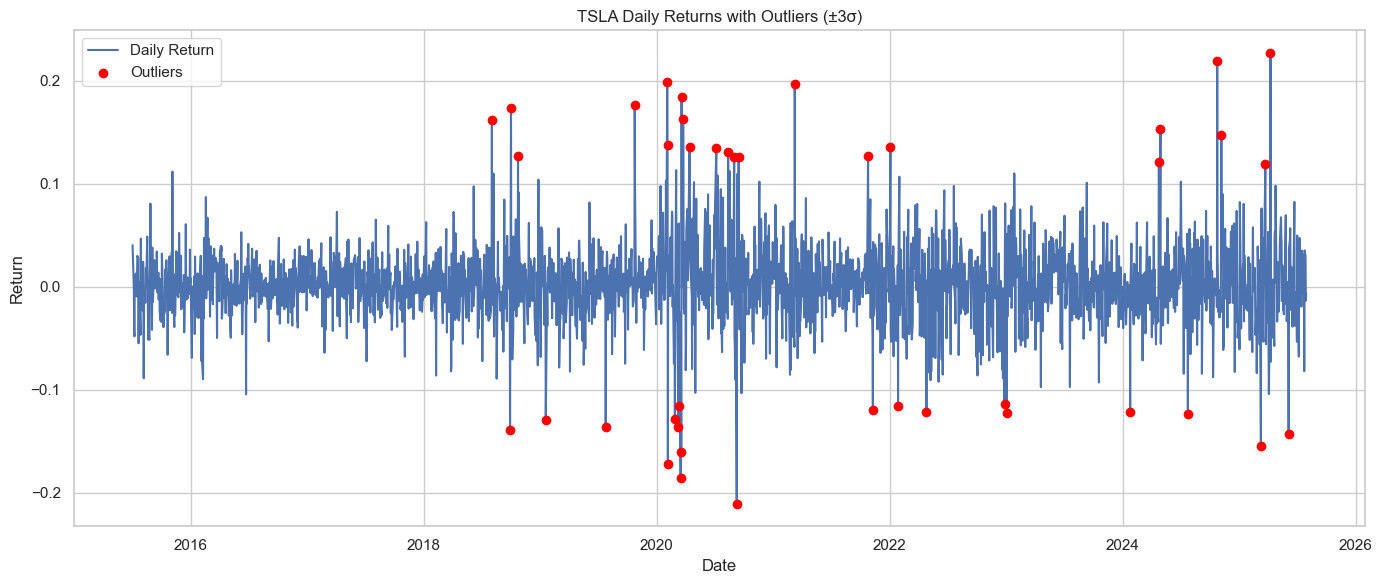

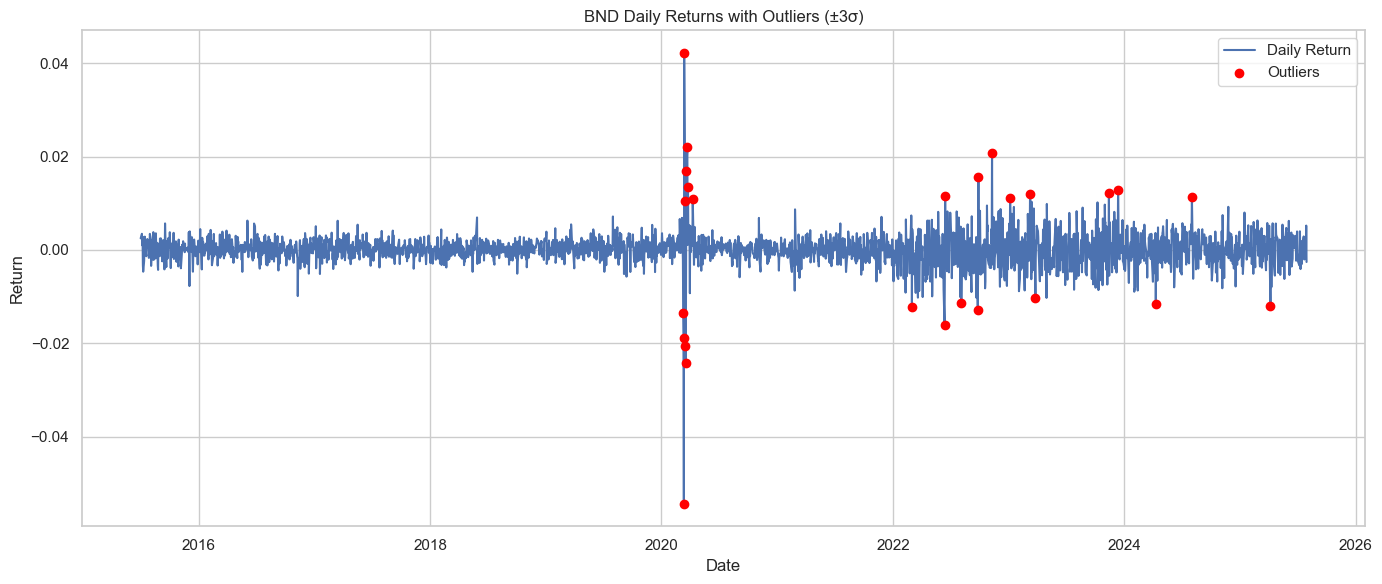

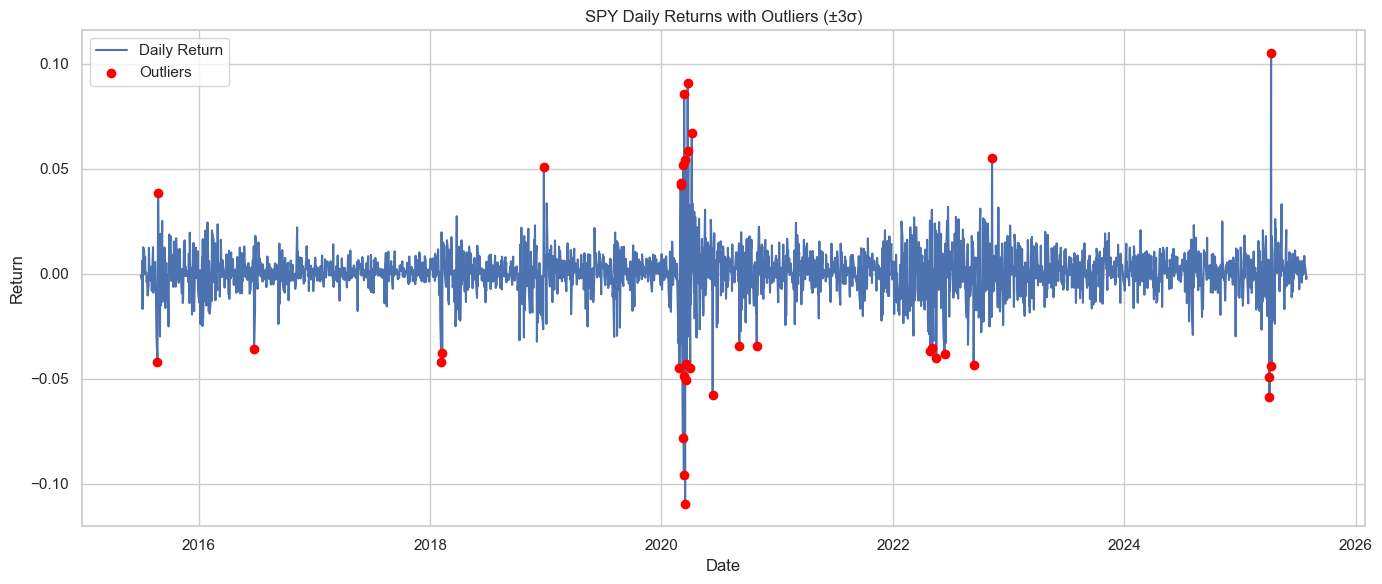

In [38]:
# Set threshold for outliers (e.g., ±3 standard deviations)
threshold = 3

for ticker in ['TSLA', 'BND', 'SPY']:
    std = data[ticker]['Daily_Return'].std()
    mean = data[ticker]['Daily_Return'].mean()
    data[ticker]['Outlier'] = data[ticker]['Daily_Return'].apply(
        lambda x: abs(x - mean) > threshold * std
    )

    # Plot outliers
    plt.figure(figsize=(14, 6))
    plt.plot(data[ticker]['Daily_Return'], label='Daily Return')
    plt.scatter(
        data[ticker].loc[data[ticker]['Outlier']].index,
        data[ticker].loc[data[ticker]['Outlier'], 'Daily_Return'],
        color='red', label='Outliers', zorder=5
    )
    plt.title(f'{ticker} Daily Returns with Outliers (±{threshold}σ)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [39]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(series, series_name):
    """
    Perform Augmented Dickey-Fuller test and print interpretation.
    """
    print(f"\nADF Test for {series_name}:")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Used Lag: {result[2]}")
    print(f"Number of Observations: {result[3]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")

    if result[1] < 0.05:
        print(f"Conclusion: Reject the null hypothesis - {series_name} is stationary.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis - {series_name} is non-stationary, differencing is recommended.")

# Assuming you have cleaned DataFrames: tsla_clean, bnd_clean, spy_clean

# Calculate daily returns (percentage change)
tsla_clean['Daily_Returns'] = tsla_clean['Close'].pct_change()
bnd_clean['Daily_Returns'] = bnd_clean['Close'].pct_change()
spy_clean['Daily_Returns'] = spy_clean['Close'].pct_change()

# Perform ADF test on closing prices
adf_test(tsla_clean['Close'], 'TSLA Closing Prices')
adf_test(bnd_clean['Close'], 'BND Closing Prices')
adf_test(spy_clean['Close'], 'SPY Closing Prices')

# Perform ADF test on daily returns
adf_test(tsla_clean['Daily_Returns'], 'TSLA Daily Returns')
adf_test(bnd_clean['Daily_Returns'], 'BND Daily Returns')
adf_test(spy_clean['Daily_Returns'], 'SPY Daily Returns')



ADF Test for TSLA Closing Prices:
ADF Statistic: -1.4195
p-value: 0.5729
Used Lag: 27
Number of Observations: 2506
Critical Value (1%): -3.4330
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Conclusion: Fail to reject the null hypothesis - TSLA Closing Prices is non-stationary, differencing is recommended.

ADF Test for BND Closing Prices:
ADF Statistic: -1.5362
p-value: 0.5155
Used Lag: 13
Number of Observations: 2521
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Conclusion: Fail to reject the null hypothesis - BND Closing Prices is non-stationary, differencing is recommended.

ADF Test for SPY Closing Prices:
ADF Statistic: 0.6908
p-value: 0.9897
Used Lag: 9
Number of Observations: 2525
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Conclusion: Fail to reject the null hypothesis - SPY Closing Prices is non-stationary, differencing is recommended.

ADF Test for TSLA Daily Returns:
ADF Stati

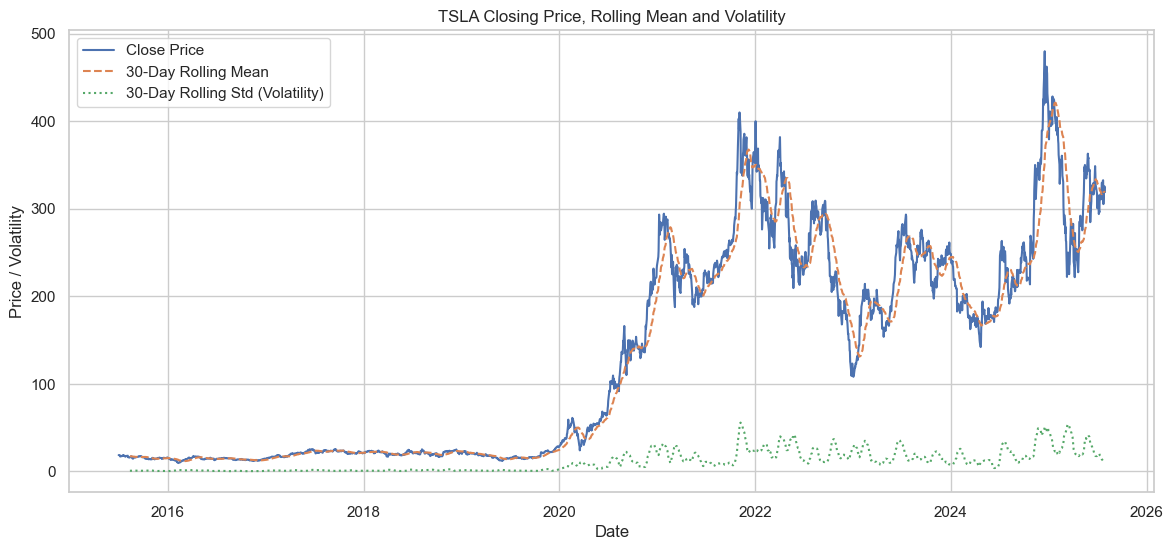

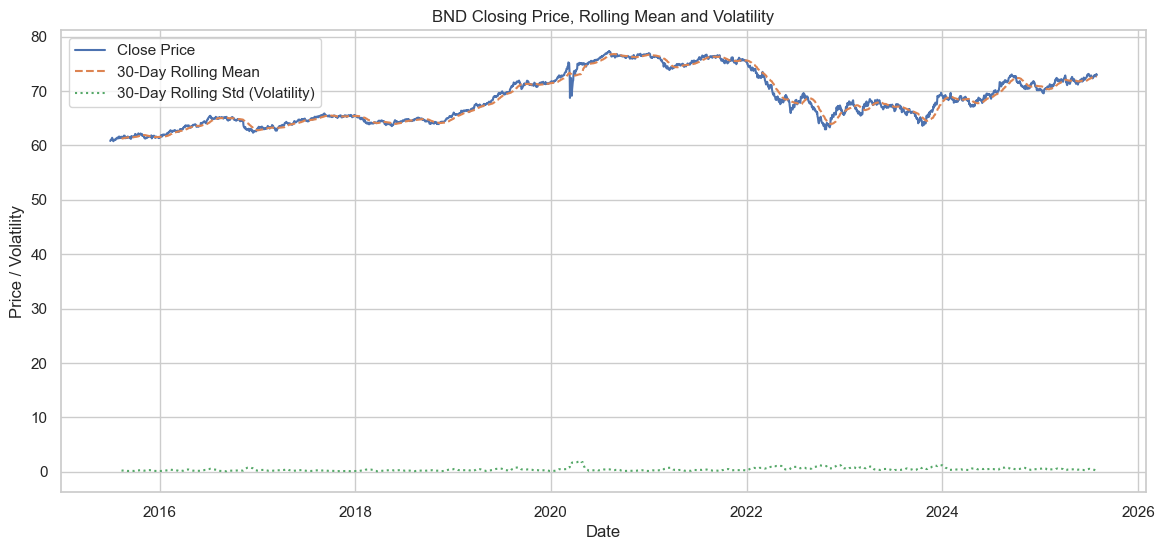

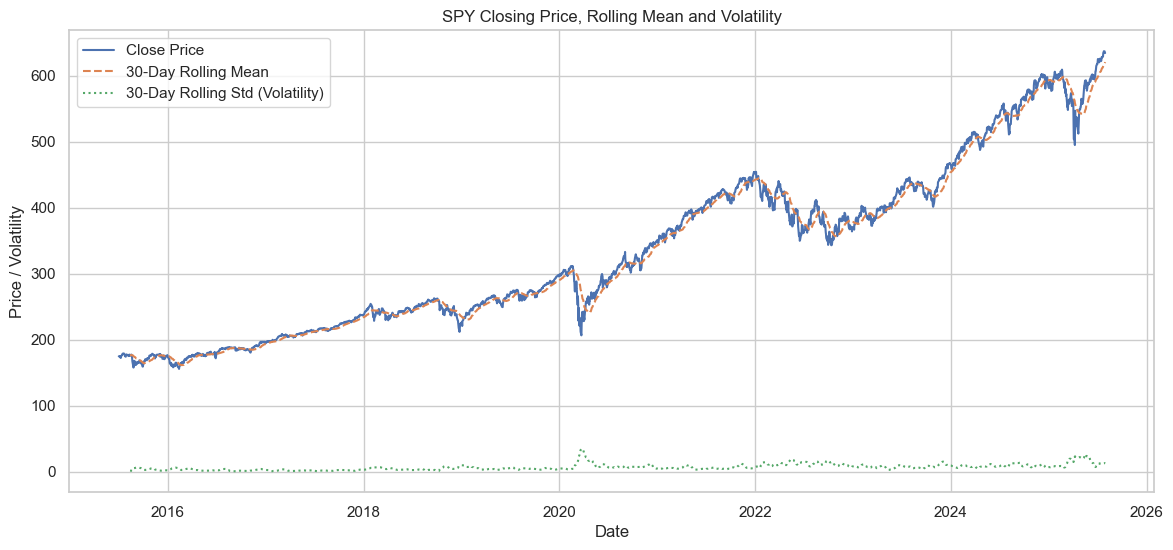

In [40]:
import matplotlib.pyplot as plt

# Define rolling window size (e.g., 30 trading days ~ 1 month)
window_size = 30

# Create a dictionary of your cleaned DataFrames if not already
data = {
    'TSLA': tsla_clean,
    'BND': bnd_clean,
    'SPY': spy_clean
}

for ticker, df in data.items():
    # Calculate rolling mean and rolling std for closing prices
    df['Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=window_size).std()

    # Plot Closing price, Rolling Mean, and Rolling Std (volatility)
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', linestyle='--')
    plt.plot(df.index, df['Rolling_Std'], label=f'{window_size}-Day Rolling Std (Volatility)', linestyle=':')
    plt.title(f'{ticker} Closing Price, Rolling Mean and Volatility')
    plt.xlabel('Date')
    plt.ylabel('Price / Volatility')
    plt.legend()
    plt.show()


In [44]:
# Convert 'Close' to numeric, coercing errors to NaN
tsla_df['Close'] = pd.to_numeric(tsla_df['Close'], errors='coerce')
bnd_df['Close'] = pd.to_numeric(bnd_df['Close'], errors='coerce')
spy_df['Close'] = pd.to_numeric(spy_df['Close'], errors='coerce')

# Drop rows where Close is NaN after conversion
tsla_df = tsla_df.dropna(subset=['Close'])
bnd_df = bnd_df.dropna(subset=['Close'])
spy_df = spy_df.dropna(subset=['Close'])


In [45]:
tsla_returns = tsla_df['Close'].pct_change().dropna()
bnd_returns = bnd_df['Close'].pct_change().dropna()
spy_returns = spy_df['Close'].pct_change().dropna()


In [46]:
import numpy as np

def calculate_var_sharpe(returns, confidence_level=0.95, trading_days=252):
    """
    Calculate daily VaR and annualized Sharpe Ratio for a series of returns.
    
    Args:
        returns (pd.Series): Daily return series.
        confidence_level (float): Confidence level for VaR calculation (default 0.95).
        trading_days (int): Number of trading days in a year (default 252).
        
    Returns:
        dict: {'VaR': float, 'Sharpe_Ratio': float}
    """
    # Calculate daily VaR (percentile of losses)
    var = np.percentile(returns, (1 - confidence_level) * 100)
    
    # Calculate annualized Sharpe Ratio (mean excess return / std dev * sqrt(trading_days))
    # Assuming risk-free rate ~0 for simplicity (can adjust if you have rf rate)
    mean_return = returns.mean()
    std_return = returns.std()
    sharpe_ratio = (mean_return / std_return) * np.sqrt(trading_days) if std_return != 0 else np.nan
    
    return {'VaR': var, 'Sharpe_Ratio': sharpe_ratio}

# Example: Calculate for TSLA, BND, SPY daily returns
results = {}
for ticker, returns in [('TSLA', tsla_returns), ('BND', bnd_returns), ('SPY', spy_returns)]:
    results[ticker] = calculate_var_sharpe(returns)

# Display results
for ticker, metrics in results.items():
    print(f"{ticker} VaR (95% confidence): {metrics['VaR']:.4f}")
    print(f"{ticker} Sharpe Ratio (annualized): {metrics['Sharpe_Ratio']:.4f}")
    print()


TSLA VaR (95% confidence): -0.0547
TSLA Sharpe Ratio (annualized): 0.7783

BND VaR (95% confidence): -0.0049
BND Sharpe Ratio (annualized): 0.3569

SPY VaR (95% confidence): -0.0172
SPY Sharpe Ratio (annualized): 0.7941



In [48]:
import os

# Create processed data folder if it doesn't exist
os.makedirs("../data/processed", exist_ok=True)

# Save cleaned datasets
tsla_clean.to_csv("../data/processed/tsla_clean.csv", index=True)
bnd_clean.to_csv("../data/processed/bnd_clean.csv", index=True)
spy_clean.to_csv("../data/processed/spy_clean.csv", index=True)
